In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_clustering.som import SOM

In [5]:
df = pd.read_csv("Datas/selected_data.csv")
df.drop_duplicates(inplace=True)
df

,amines,ether,aldehyde,aromatic,cycle
0,1,0,1,1,2
1,1,0,0,1,0
2,3,0,1,0,2
3,2,0,1,1,0
4,1,0,0,2,2
...,...,...,...,...,...
61368,2,1,0,2,4
61807,2,1,1,1,5
61847,0,3,3,2,3
62025,1,0,0,5,0


<Axes: >

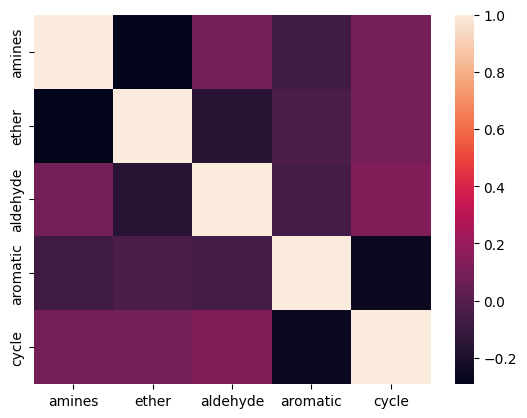

In [6]:
sns.heatmap(df.corr())

In [7]:
X = df.values
model = SOM(m = 3,
            n = 1, 
            dim=X.shape[1],
            max_iter=1,
            initiate_method="SOM++",
            learning_rate=0.5,
            neighbour_rad=5)
model.fit(X, epoch=50)
model.neurons

array([[[2, 1, 1, 1, 1]],

       [[0, 3, 0, 1, 3]],

       [[0, 1, 1, 0, 3]]], dtype=int64)

In [8]:
cluster_centers = model.neurons
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(3, 5)

In [9]:
cc = pd.DataFrame(cluster_centers, columns=df.columns)
cc.dropna(axis=1, inplace=True)
cc.round(4)

,amines,ether,aldehyde,aromatic,cycle
0,2,1,1,1,1
1,0,3,0,1,3
2,0,1,1,0,3


In [ ]:
cc.round(4).to_excel("Datas/Stats/clustercenters.xlsx", index=False)
cc.round(4).to_csv("Datas/Stats/clustercenters.csv", index=False)